# 4.4. Softmax Regression Implementation from Scratch

In [1]:
%matplotlib inline
import sys

import torch

sys.path.append("../..")
from dataloaders import FashionMNIST
from models import SoftmaxRegressionScratch
from utils import Trainer


### 4.4.1. The Softmax

In [2]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [3]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [4]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2283, 0.2517, 0.1356, 0.2512, 0.1332],
         [0.1850, 0.1883, 0.2431, 0.2732, 0.1103]]),
 tensor([1.0000, 1.0000]))

### 4.4.2. The Model

In [5]:
# implemented in models/softmax_regression_scratch.py

### 4.4.3. The Cross-Entropy Loss

In [6]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [7]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

### 4.4.4. Training

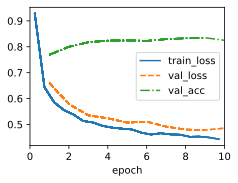

In [8]:
data = FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5. Prediction

In [9]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

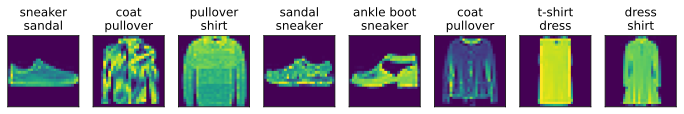

In [10]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)